# COVID result plots 

In [1]:
import numpy as np
import pandas as pd
import time
import sys
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker


import seaborn as sns


sns.set()
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

This notebook plots the results of all algorithms. First, set the paths bellow to your corresponding paths.  

In [1]:
result_path = 'SET_RESULTS_PATH'
figure_path = 'SET_FIGURE_PATH'

## Import results

In [4]:
results_SigLasso_normalized_weighted = pd.read_csv(result_path + "results_SigLasso_normalized_weighted.cvs")
results_test_SigLasso_normalized_weighted = pd.read_csv(result_path + "results_test_SigLasso_normalized_weighted.cvs")

results_SigLasso_normalized= pd.read_csv(result_path + "results_SigLasso_normalized.cvs")
results_test_SigLasso_normalized = pd.read_csv(result_path + "results_test_SigLasso_normalized.cvs")

results_NCDE = pd.read_csv(result_path + "results_NCDE.cvs")
results_test_NCDE = pd.read_csv(result_path + "results_test_NCDE.cvs")

results_GRU= pd.read_csv(result_path + "results_GRU.cvs")
results_test_GRU= pd.read_csv(result_path + "results_test_GRU.cvs")

results_PNAS = pd.read_csv(result_path + "result_PNAS.cvs")
results_PNAS['date']= pd.to_datetime(results_PNAS['date'])
results_PNAS = results_PNAS.loc[results_PNAS['date']>=pd.to_datetime('2021-03-31')]

In [8]:
results_SigLasso_normalized_weighted.head()

Unnamed: 0        days region     truth     pred1     pred2     pred3  \
0           0  2021-03-31    ARA  0.019742 -0.033275 -0.021666 -0.024672   
1           1  2021-03-31    BFC  0.018693 -0.032930 -0.018950 -0.021078   
2           2  2021-03-31    BRE  0.006214 -0.032988 -0.022072 -0.024158   
3           3  2021-03-31    CVL  0.018814 -0.032694 -0.016701 -0.018556   
4           4  2021-03-31    GES  0.012530 -0.032086 -0.015811 -0.018936   

      pred4     pred5     pred6     pred7     pred8     pred9    pred10  \
0 -0.026332 -0.028124 -0.030528 -0.032153 -0.030990 -0.030487 -0.030626   
1 -0.021763 -0.022641 -0.024563 -0.025786 -0.024345 -0.023694 -0.023597   
2 -0.024513 -0.024786 -0.025143 -0.025073 -0.024214 -0.024936 -0.026771   
3 -0.018547 -0.018488 -0.019082 -0.018605 -0.017160 -0.017278 -0.018640   
4 -0.019656 -0.020486 -0.022569 -0.023838 -0.023520 -0.024278 -0.025273   

     pred11    pred12    pred13    pred14  
0 -0.017996 -0.032956 -0.034813 -0.033635  
1 -0.013450 -0.025487 -0.028795 -0.030831  
2 -0.030382 -0.034700 -0.040445 -0.040545  
3 -0.021646 -0.027671 -0.032927 -0.037016  
4 -0.023300 -0.029948 -0.032893 -0.034826

# Ploting the results by region

In [5]:
regions = ["ARA", "BFC", "BRE", "CVL",  "GES", "HDF", "IDF", "NOR",
                      "NAQ", "OCC", "PDL", "PAC"]

# Plot for all regions

In [6]:
results_SigLasso_normalized_weighted

Unnamed: 0        days region     truth     pred1     pred2     pred3  \
0              0  2021-03-31    ARA  0.019742 -0.033275 -0.021666 -0.024672   
1              1  2021-03-31    BFC  0.018693 -0.032930 -0.018950 -0.021078   
2              2  2021-03-31    BRE  0.006214 -0.032988 -0.022072 -0.024158   
3              3  2021-03-31    CVL  0.018814 -0.032694 -0.016701 -0.018556   
4              4  2021-03-31    GES  0.012530 -0.032086 -0.015811 -0.018936   
...          ...         ...    ...       ...       ...       ...       ...   
1015        1015  2021-06-23    NOR -0.067962 -0.029292 -0.032474 -0.029745   
1016        1016  2021-06-23    NAQ -0.063112 -0.031618 -0.040118 -0.042476   
1017        1017  2021-06-23    OCC -0.063373 -0.033653 -0.055449 -0.055685   
1018        1018  2021-06-23    PDL -0.047709 -0.029632 -0.028969 -0.027790   
1019        1019  2021-06-23    PAC -0.028283 -0.035294 -0.044833 -0.045901   

         pred4     pred5     pred6     pred7     pred8     pred9    pred10  \
0    -0.026332 -0.028124 -0.030528 -0.032153 -0.030990 -0.030487 -0.030626   
1    -0.021763 -0.022641 -0.024563 -0.025786 -0.024345 -0.023694 -0.023597   
2    -0.024513 -0.024786 -0.025143 -0.025073 -0.024214 -0.024936 -0.026771   
3    -0.018547 -0.018488 -0.019082 -0.018605 -0.017160 -0.017278 -0.018640   
4    -0.019656 -0.020486 -0.022569 -0.023838 -0.023520 -0.024278 -0.025273   
...        ...       ...       ...       ...       ...       ...       ...   
1015 -0.031539 -0.034094 -0.036485 -0.037306 -0.040548 -0.036777 -0.033786   
1016 -0.045247 -0.046398 -0.040660 -0.034362 -0.032329 -0.026732 -0.024105   
1017 -0.055297 -0.051803 -0.042646 -0.034633 -0.032342 -0.026748 -0.024264   
1018 -0.029442 -0.033584 -0.036203 -0.034936 -0.035247 -0.029753 -0.026614   
1019 -0.045791 -0.044418 -0.039580 -0.034729 -0.035364 -0.031187 -0.029450   

        pred11    pred12    pred13    pred14  
0    -0.017996 -0.032956 -0.034813 -0.033635  
1    -0.013450 -0.025487 -0.028795 -0.030831  
2    -0.030382 -0.034700 -0.040445 -0.040545  
3    -0.021646 -0.027671 -0.032927 -0.037016  
4    -0.023300 -0.029948 -0.032893 -0.034826  
...        ...       ...       ...       ...  
1015 -0.037587 -0.033145 -0.036516 -0.038879  
1016 -0.023319 -0.024759 -0.031953 -0.036700  
1017 -0.023072 -0.023627 -0.032540 -0.036781  
1018 -0.029223 -0.027576 -0.033354 -0.037586  
1019 -0.030078 -0.027071 -0.035037 -0.038425  

[1020 rows x 18 columns]

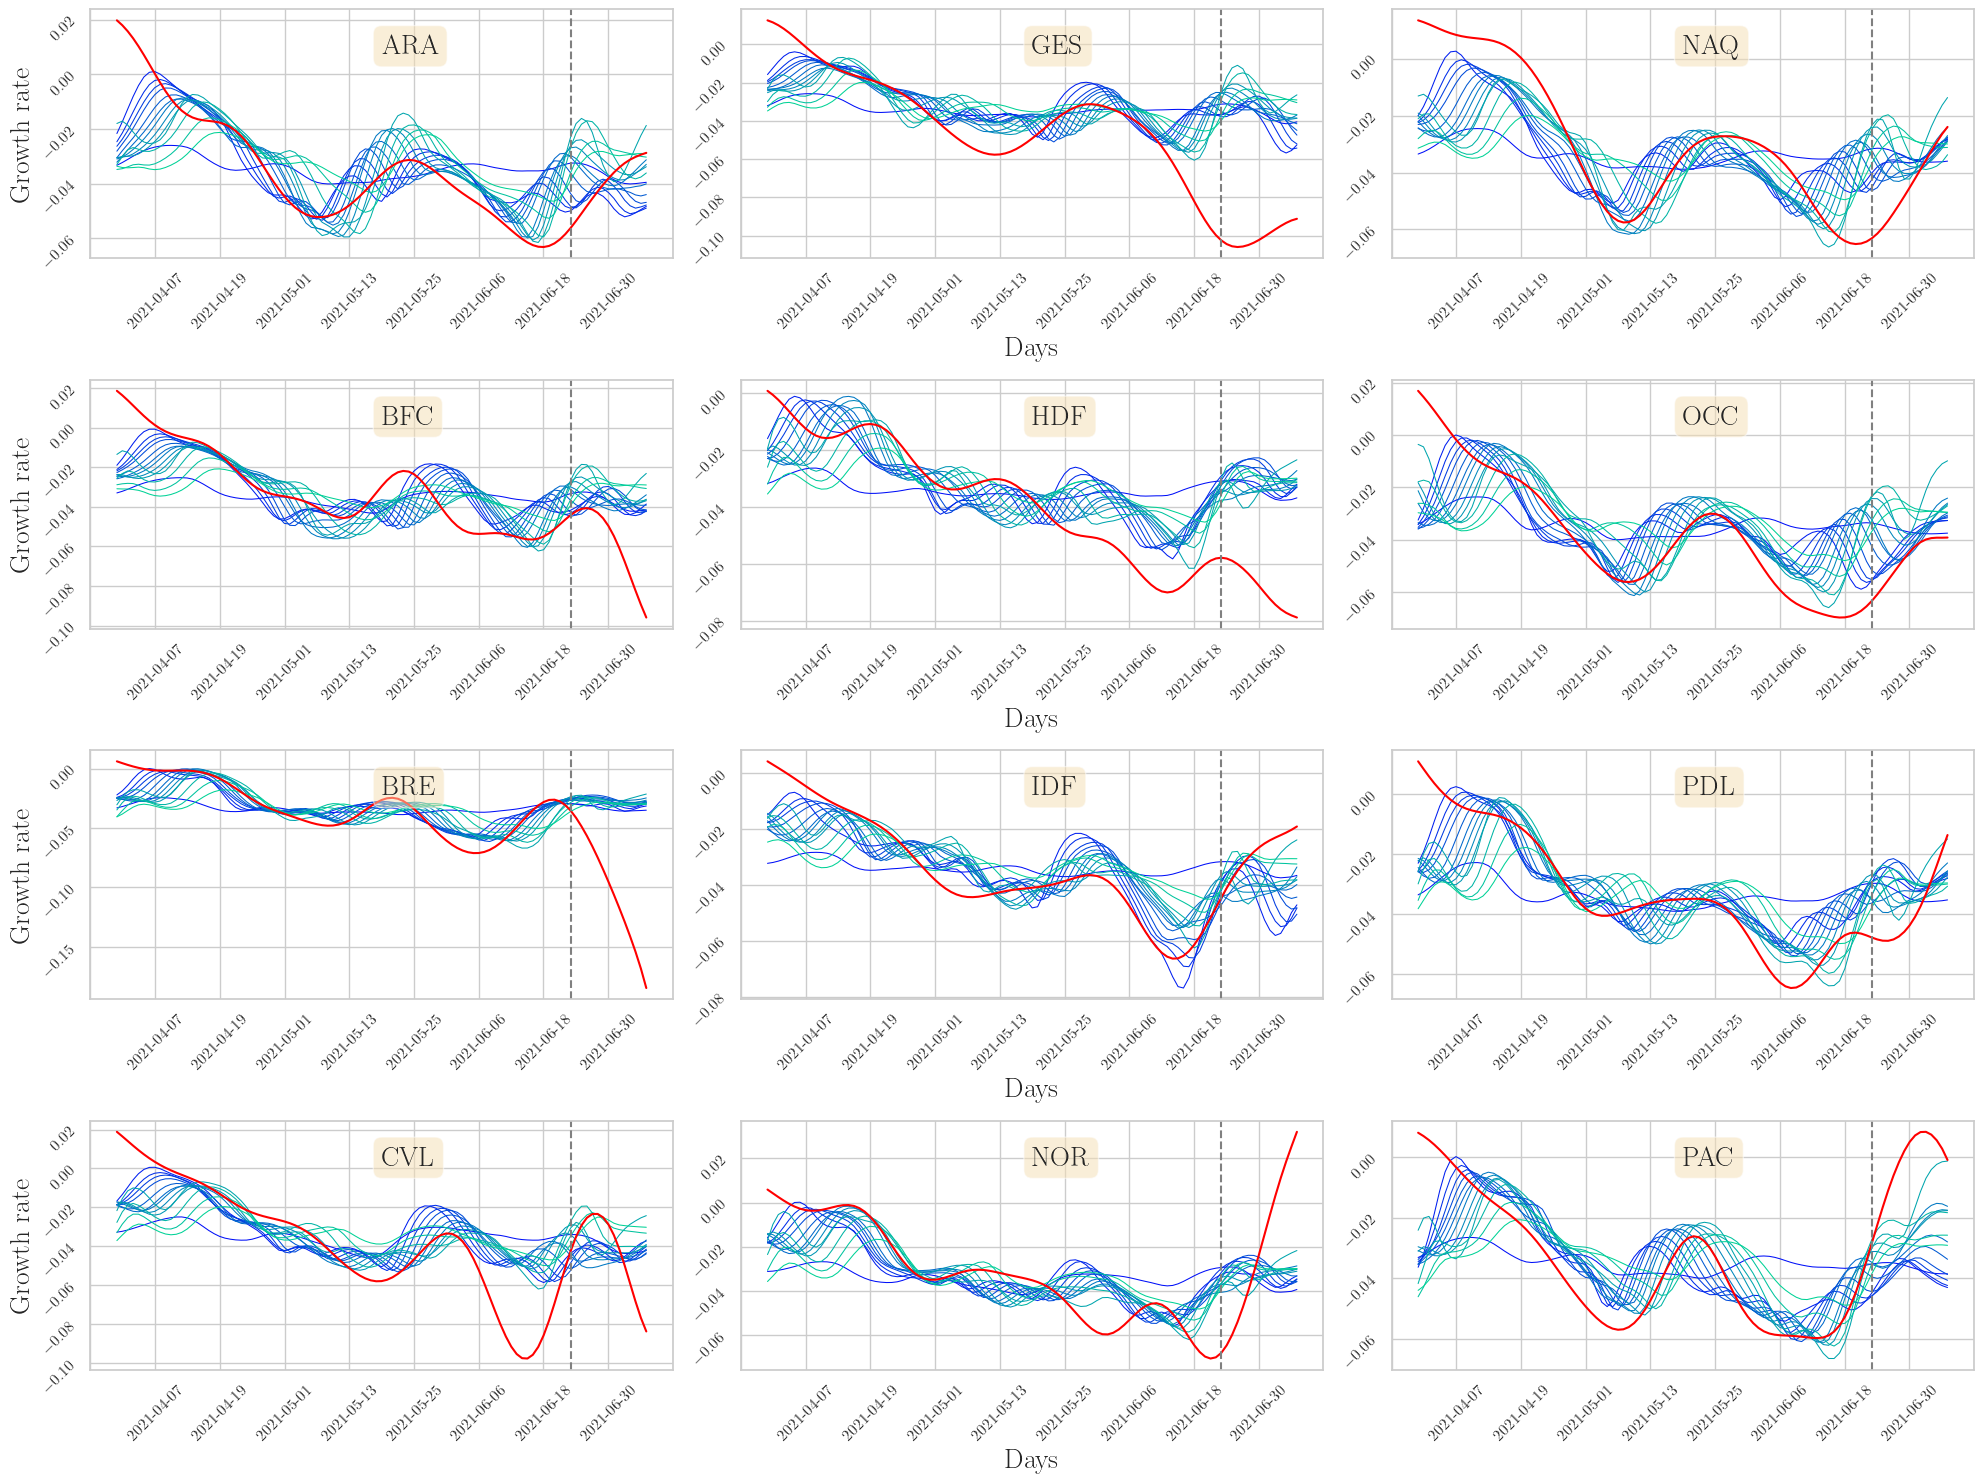

In [7]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


f,ax=plt.subplots(4,3,figsize=(20,15))
plt.xticks(rotation=90)


for i,region in enumerate(regions):
    results_train_SigLasso_region_normalized_weighted = results_SigLasso_normalized_weighted.loc[results_SigLasso_normalized_weighted['region']==region]

    results_test_SigLasso_region_normalized_weighted = results_test_SigLasso_normalized_weighted.loc[results_test_SigLasso_normalized_weighted['region']==region]

    results_SigLasso_region_normalized_weighted = pd.concat([results_train_SigLasso_region_normalized_weighted,results_test_SigLasso_region_normalized_weighted])
    results_SigLasso_region_normalized_weighted = results_SigLasso_region_normalized_weighted.reset_index()
    
    for horizon in np.arange(1,15):
        sns.lineplot(x = 'days', y = 'pred'+str(horizon),
                 legend = False, size = 0.5,
                 data = results_SigLasso_region_normalized_weighted,ax=ax[i%4,i//4])

    sns.lineplot(x = 'days', y = 'truth',
                 legend = False, color = 'red',
                 data = results_SigLasso_region_normalized_weighted,ax=ax[i%4,i//4])
    ax[i%4,i//4].axvline(x = results_train_SigLasso_region_normalized_weighted['days'].max(), color = 'grey',linestyle = "--")
    ax[i%4,i//4].tick_params(labelrotation=45)
    #axes[0].set_ylim(-0.5, 0.5)
    ax[i%4,i//4].xaxis.set_major_locator(ticker.LinearLocator(10))
    ax[i%4,i//4].text(0.5, 0.90, region, transform=ax[i%4,i//4].transAxes, fontsize=20,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


    if i in [0,1,2,3]:
        ax[i%4,i//4].set_ylabel(ylabel= r'Growth rate',fontsize=20)
    else: 
        ax[i%4,i//4].set_ylabel(ylabel= r'',fontsize=20)
    if i in [4,5,6,7]:
        ax[i%4,i//4].set_xlabel(xlabel = 'Days',fontsize=20)
    else:
        ax[i%4,i//4].set_xlabel(xlabel = '',fontsize=20)
    plt.tight_layout()

#plt.savefig(figure_path + 'all_regions_siglasso_normalized_weighted.pdf')

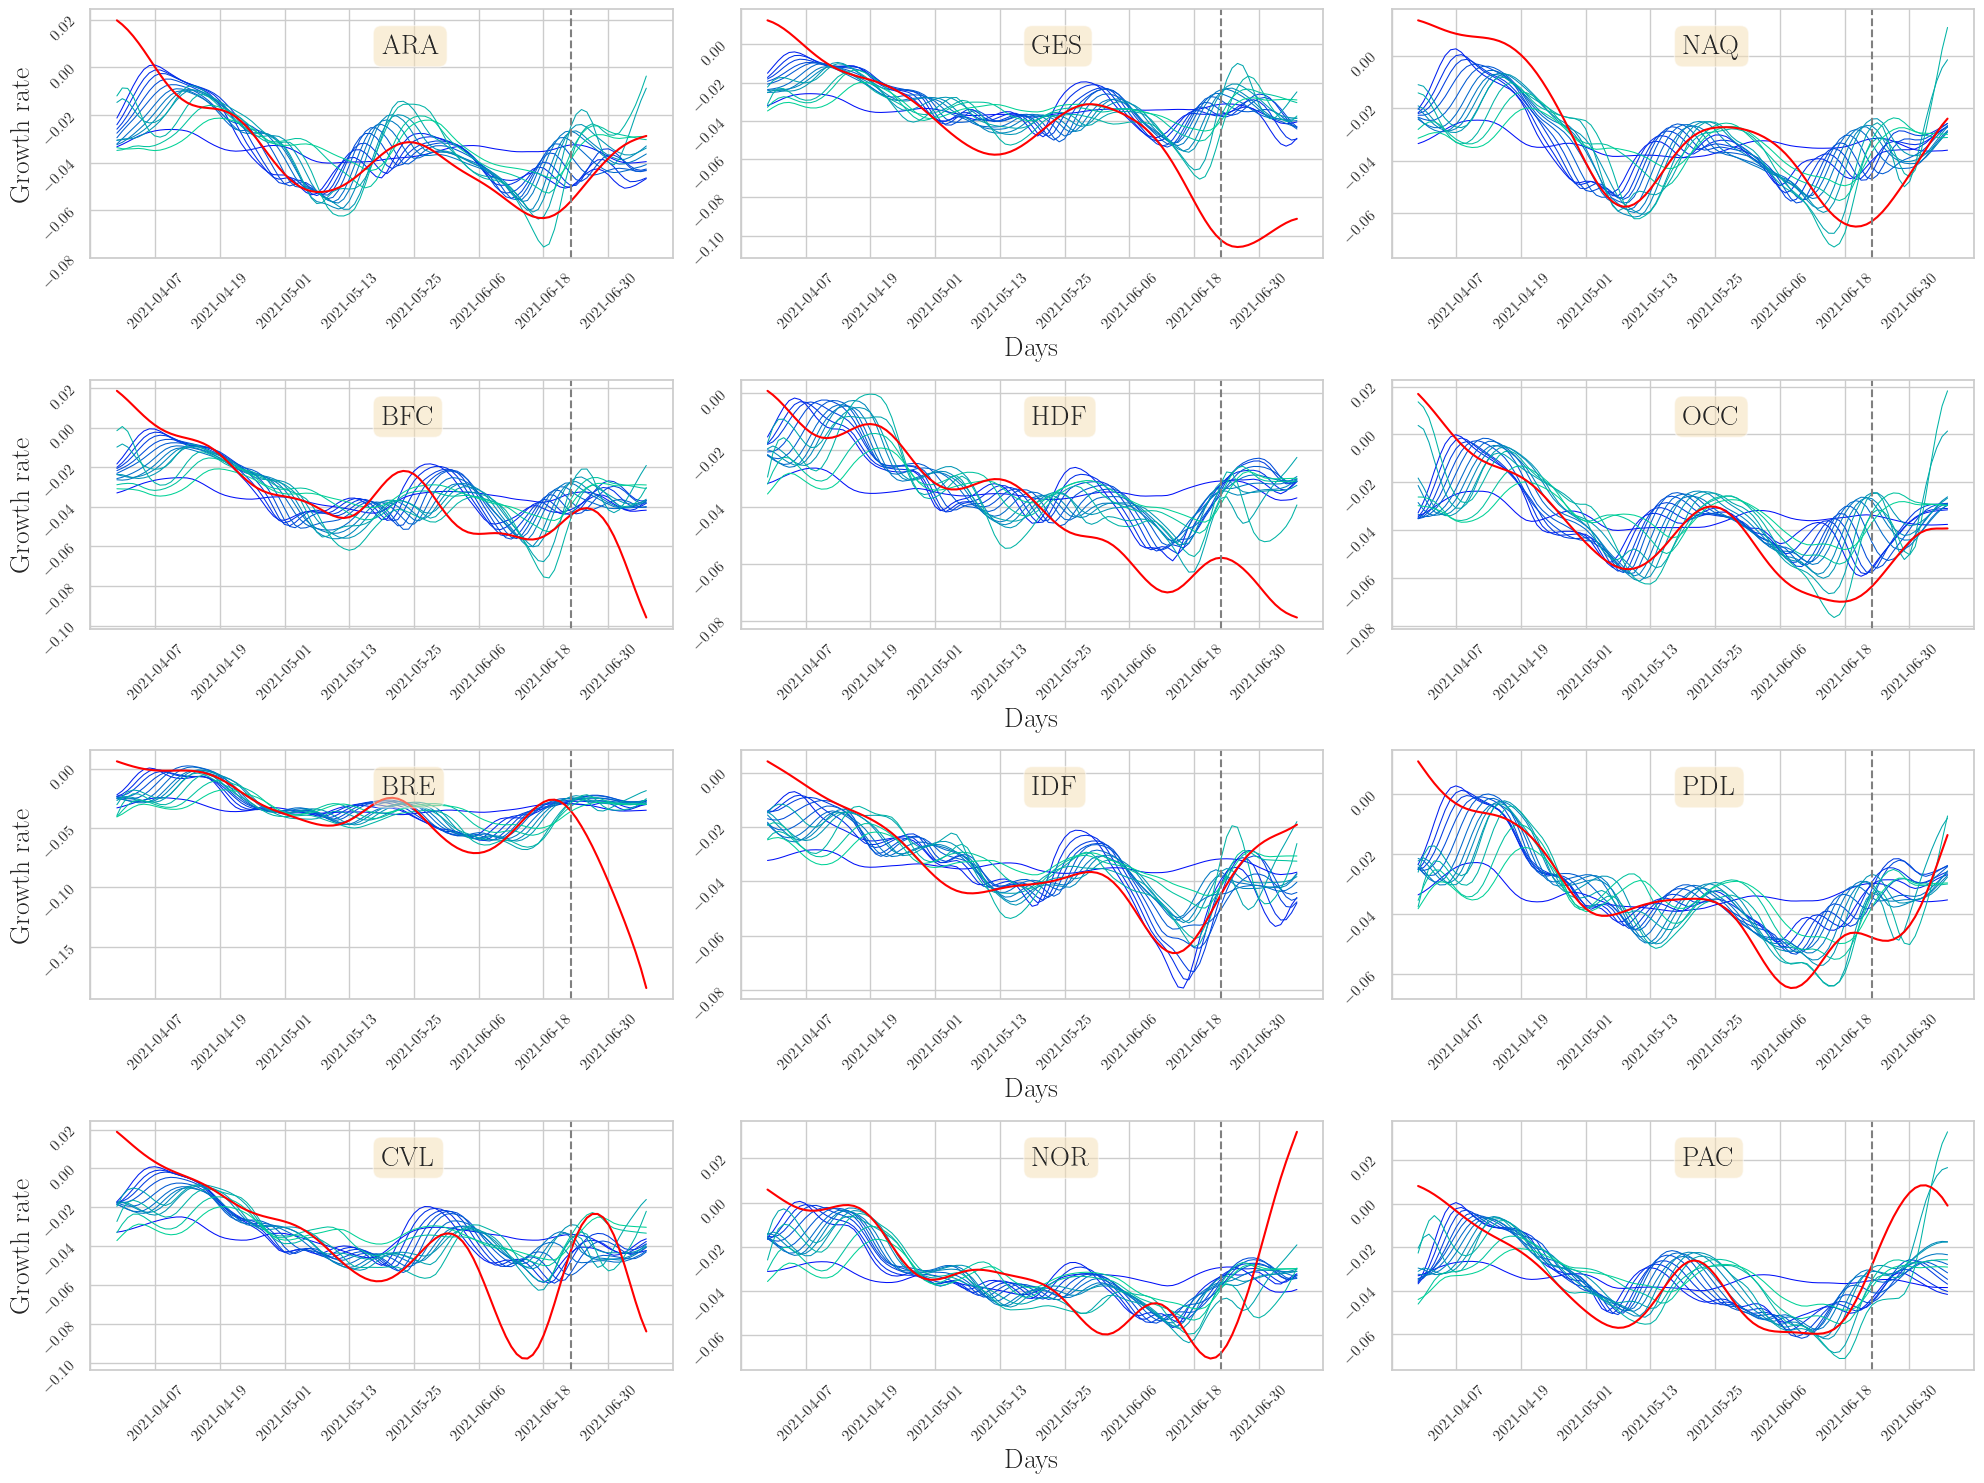

In [8]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


f,ax=plt.subplots(4,3,figsize=(20,15))
plt.xticks(rotation=90)


for i,region in enumerate(regions):
    results_train_SigLasso_region_normalized = results_SigLasso_normalized.loc[results_SigLasso_normalized['region']==region]

    results_test_SigLasso_region_normalized = results_test_SigLasso_normalized.loc[results_test_SigLasso_normalized['region']==region]

    results_SigLasso_region_normalized = pd.concat([results_train_SigLasso_region_normalized,results_test_SigLasso_region_normalized])
    results_SigLasso_region_normalized = results_SigLasso_region_normalized.reset_index()
    
    for horizon in np.arange(1,15):
        sns.lineplot(x = 'days', y = 'pred'+str(horizon),
                 legend = False, size = 0.5,
                 data = results_SigLasso_region_normalized,ax=ax[i%4,i//4])

    sns.lineplot(x = 'days', y = 'truth',
                 legend = False, color = 'red',
                 data = results_SigLasso_region_normalized,ax=ax[i%4,i//4])
    ax[i%4,i//4].axvline(x = results_train_SigLasso_region_normalized['days'].max(), color = 'grey',linestyle = "--")
    ax[i%4,i//4].tick_params(labelrotation=45)
    #axes[0].set_ylim(-0.5, 0.5)
    ax[i%4,i//4].xaxis.set_major_locator(ticker.LinearLocator(10))
    ax[i%4,i//4].text(0.5, 0.90, region, transform=ax[i%4,i//4].transAxes, fontsize=20,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


    if i in [0,1,2,3]:
        ax[i%4,i//4].set_ylabel(ylabel= r'Growth rate',fontsize=20)
    else: 
        ax[i%4,i//4].set_ylabel(ylabel= r'',fontsize=20)
    if i in [4,5,6,7]:
        ax[i%4,i//4].set_xlabel(xlabel = 'Days',fontsize=20)
    else:
        ax[i%4,i//4].set_xlabel(xlabel = '',fontsize=20)
    plt.tight_layout()

#plt.savefig(figure_path + 'all_regions_siglasso_normalized.pdf')

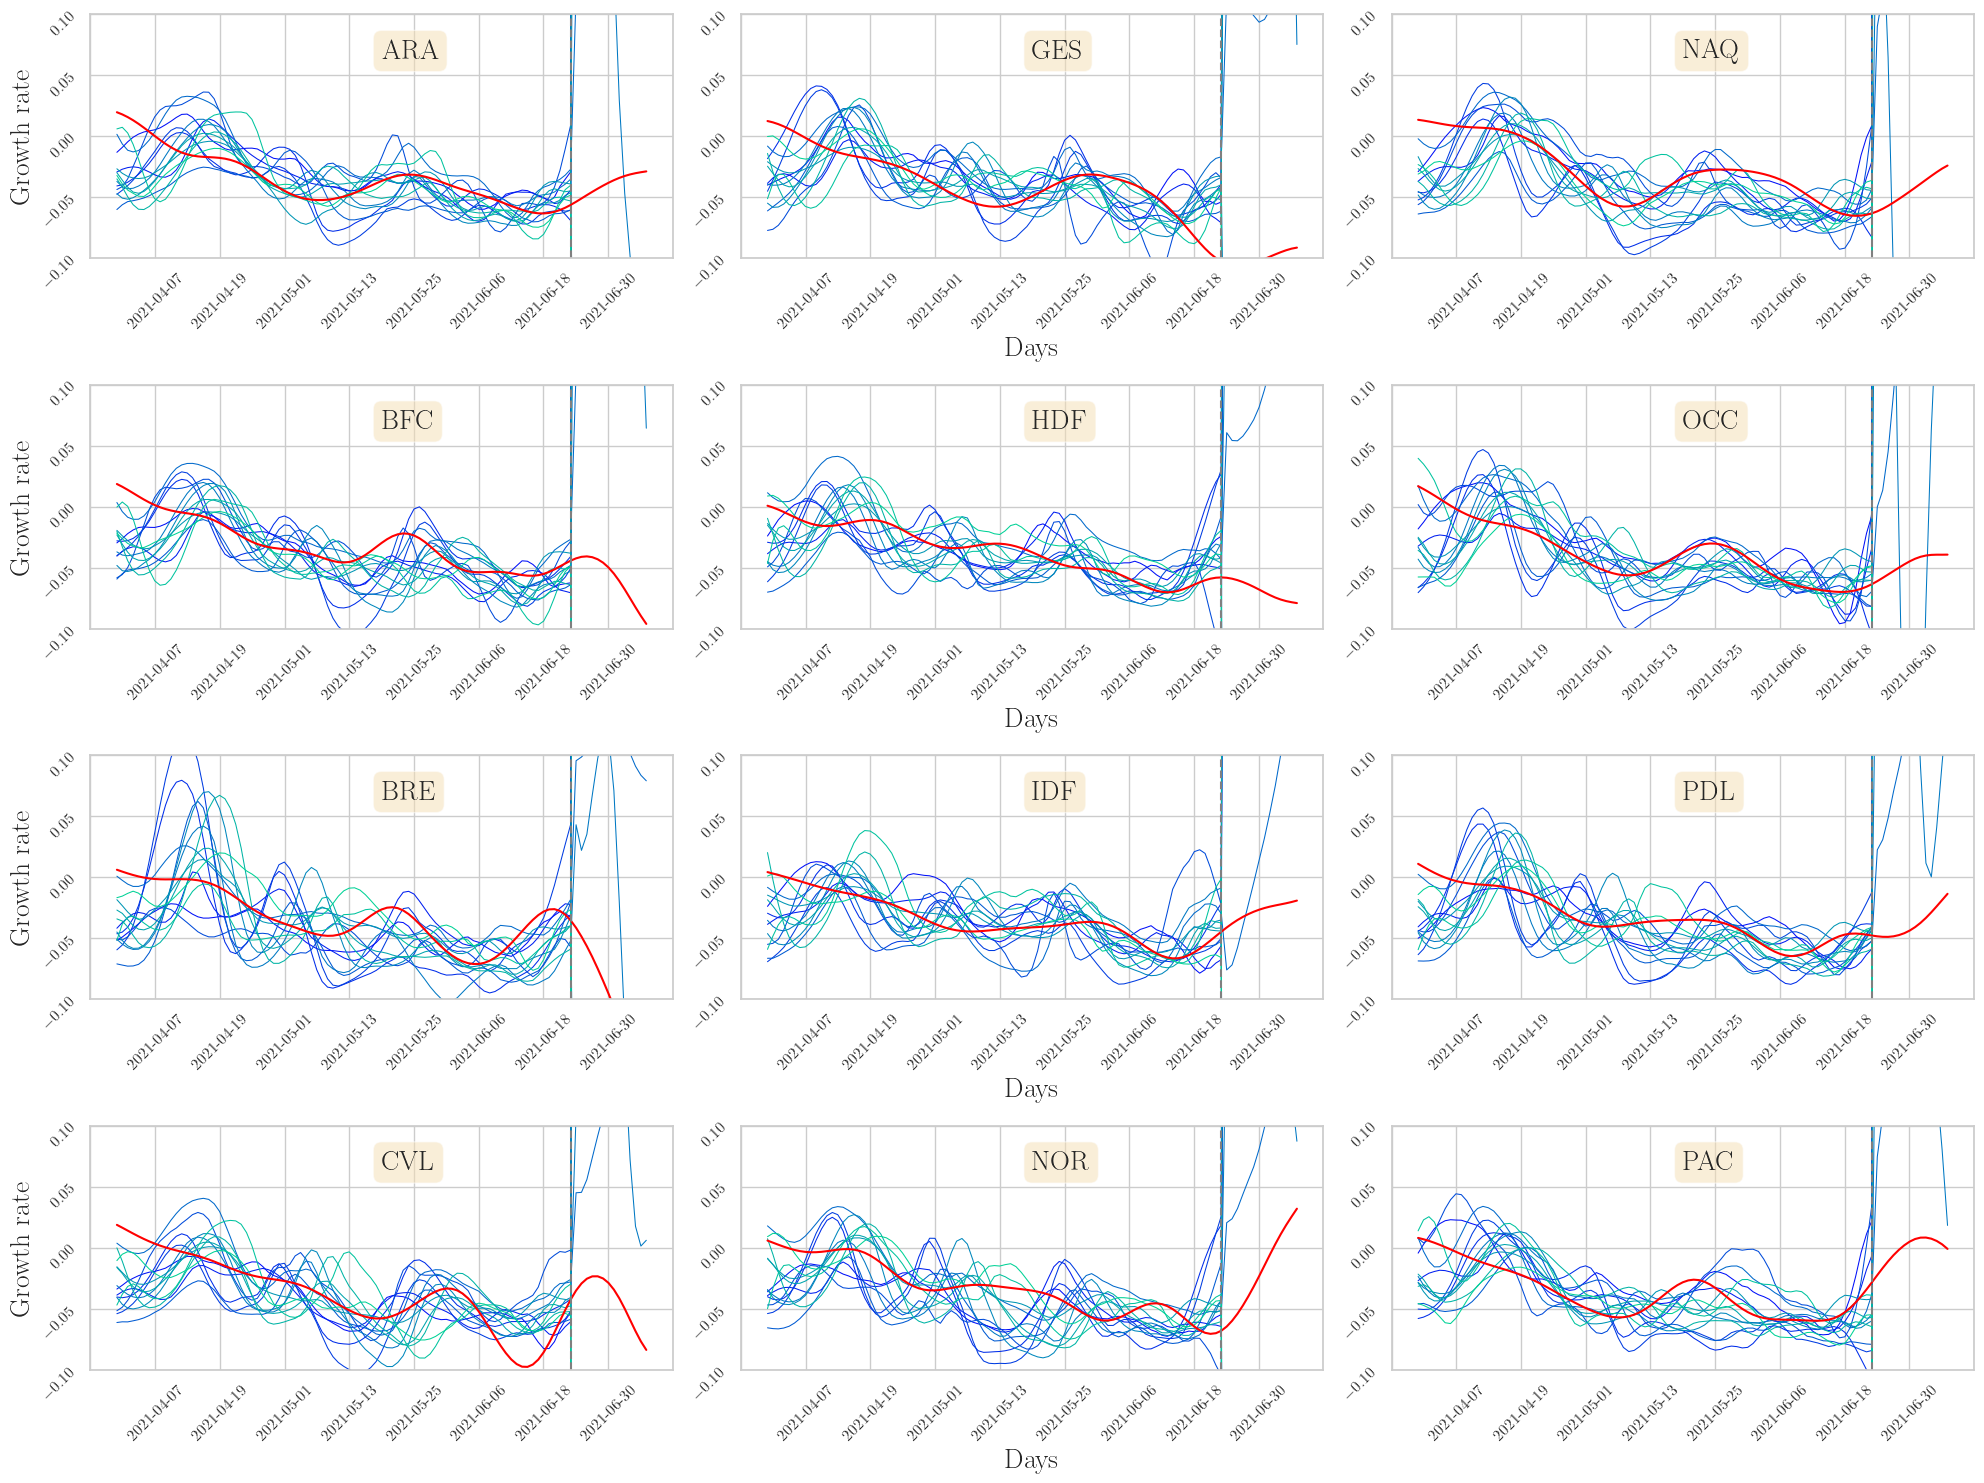

In [11]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


f,ax=plt.subplots(4,3,figsize=(20,15))
plt.xticks(rotation=90)


for i,region in enumerate(regions):
    results_train_NCDE_region = results_NCDE.loc[results_NCDE['region']==region]

    results_test_NCDE_region = results_test_NCDE.loc[results_test_NCDE['region']==region]

    results_NCDE_region = pd.concat([results_train_NCDE_region,results_test_NCDE_region])
    results_NCDE_region = results_NCDE_region.reset_index()
    
    for horizon in np.arange(1,15):
        sns.lineplot(x = 'days', y = 'pred'+str(horizon),
                 legend = False, size = 0.5,
                 data = results_NCDE_region,ax=ax[i%4,i//4])

    sns.lineplot(x = 'days', y = 'truth',
                 legend = False, color = 'red',
                 data = results_NCDE_region,ax=ax[i%4,i//4])
    ax[i%4,i//4].axvline(x = results_train_NCDE_region['days'].max(), color = 'grey',linestyle = "--")
    ax[i%4,i//4].tick_params(labelrotation=45)
    ax[i%4,i//4].set_ylim(-0.1, 0.1)
    ax[i%4,i//4].xaxis.set_major_locator(ticker.LinearLocator(10))
    ax[i%4,i//4].text(0.5, 0.90, region, transform=ax[i%4,i//4].transAxes, fontsize=20,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


    if i in [0,1,2,3]:
        ax[i%4,i//4].set_ylabel(ylabel= r'Growth rate',fontsize=20)
    else: 
        ax[i%4,i//4].set_ylabel(ylabel= r'',fontsize=20)
    if i in [4,5,6,7]:
        ax[i%4,i//4].set_xlabel(xlabel = 'Days',fontsize=20)
    else:
        ax[i%4,i//4].set_xlabel(xlabel = '',fontsize=20)
    plt.tight_layout()

plt.savefig(figure_path + 'all_regions_ncde.pdf')

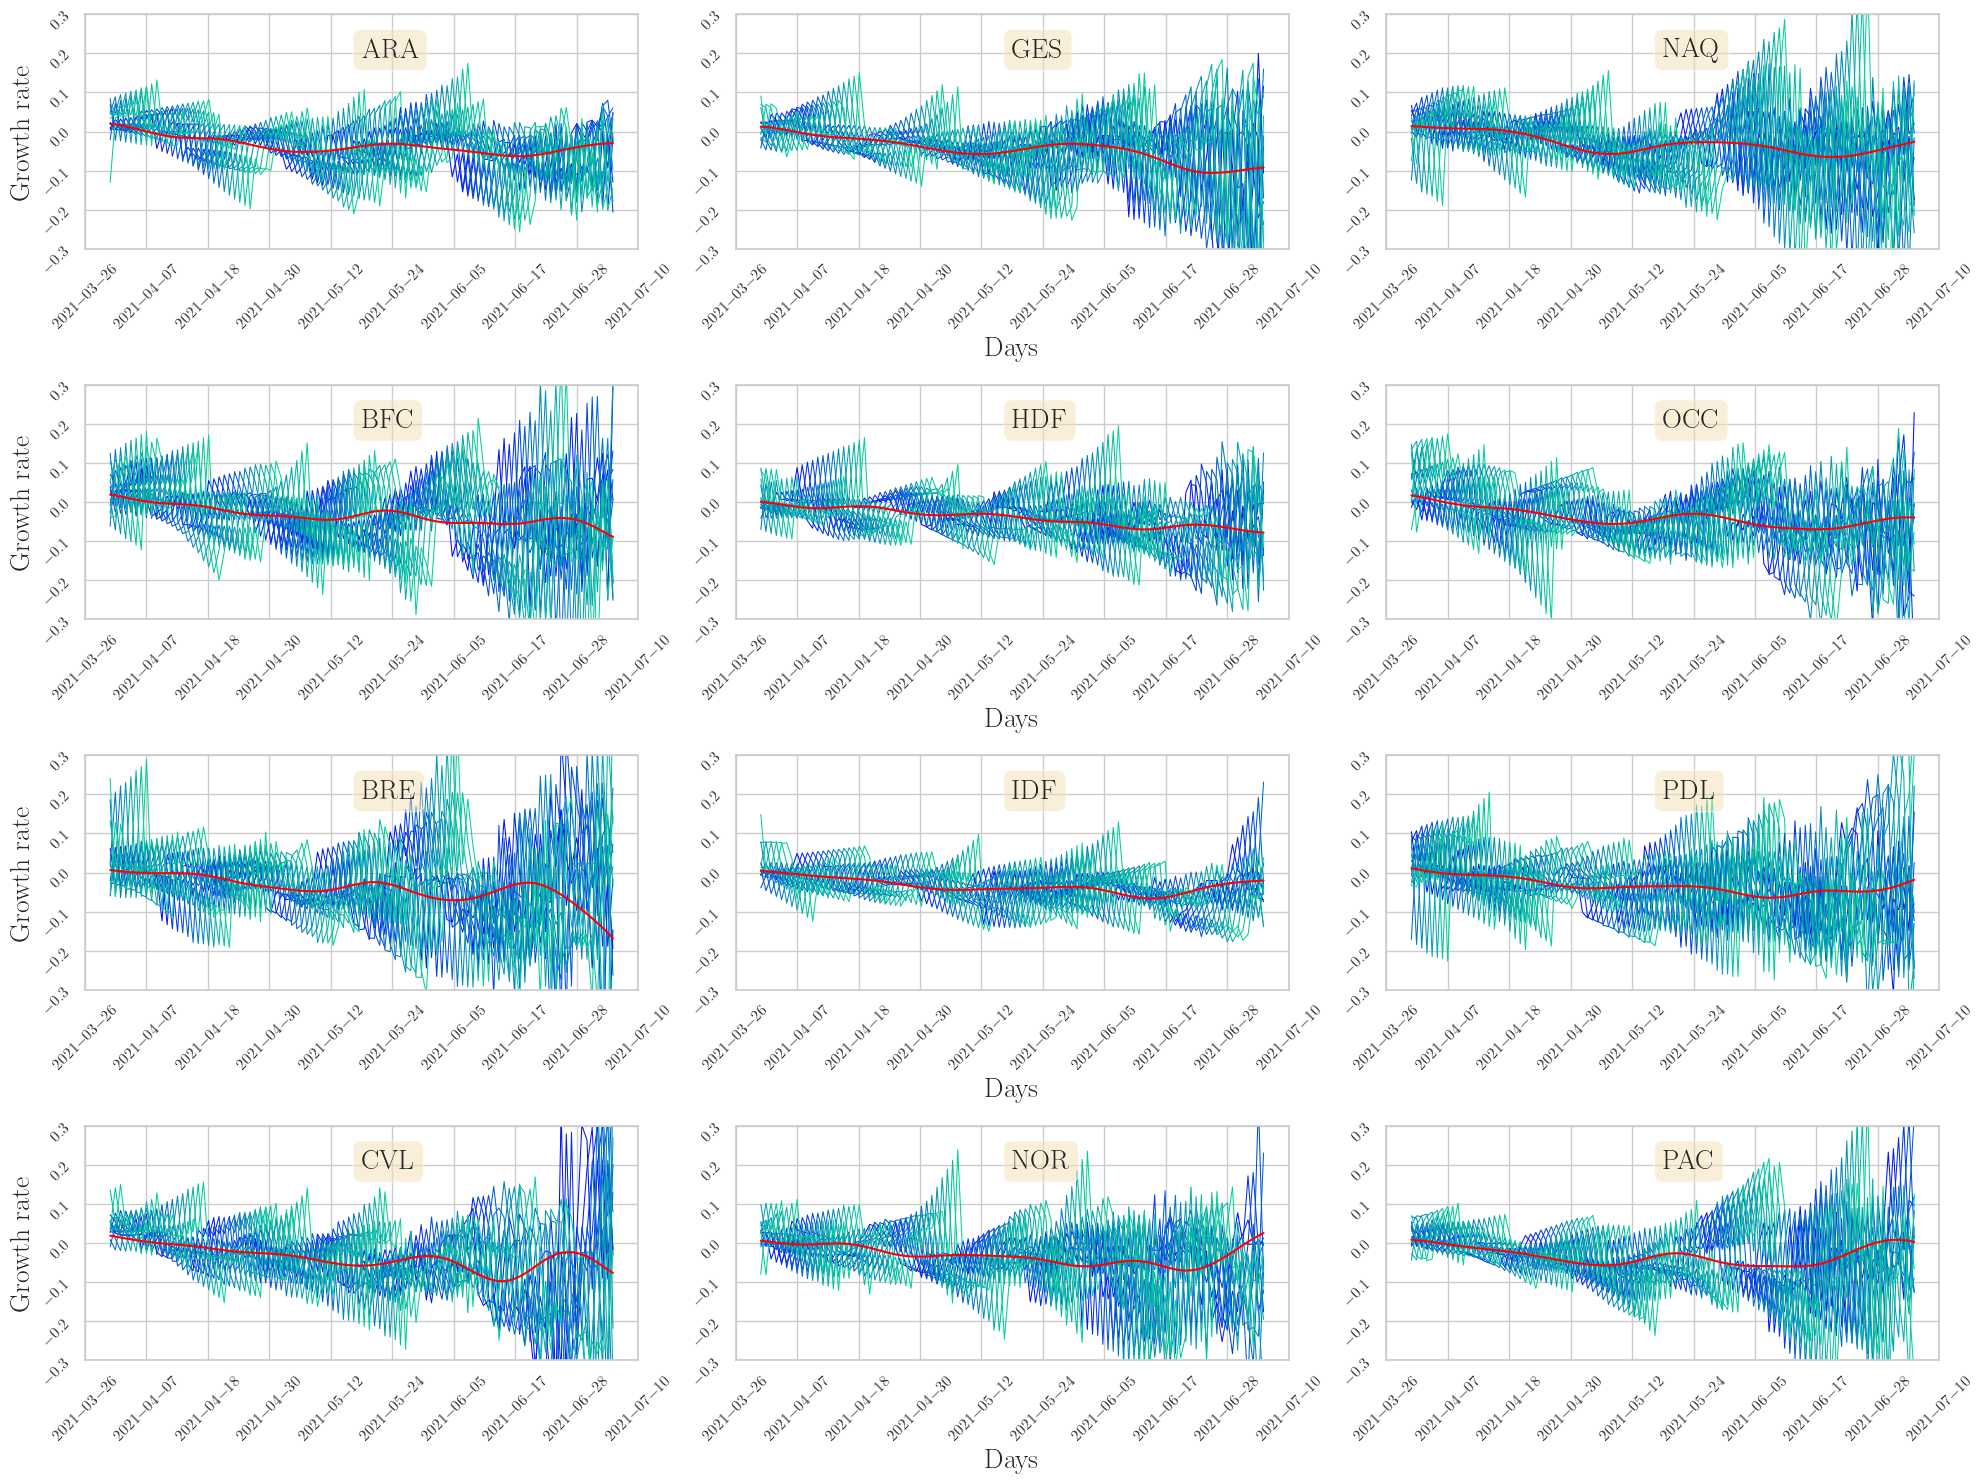

In [50]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


f,ax=plt.subplots(4,3,figsize=(20,15))
plt.xticks(rotation=90)


for i,region in enumerate(regions):
    results_PNAS_region = results_PNAS.loc[results_PNAS['region']==region]
    
    results_train_NCDE_region = results_NCDE.loc[results_NCDE['region']==region]

    results_test_NCDE_region = results_test_NCDE.loc[results_test_NCDE['region']==region]

    results_NCDE_region = pd.concat([results_train_NCDE_region,results_test_NCDE_region])
    results_NCDE_region = results_NCDE_region.reset_index()
    
    for horizon in np.arange(1,15):
        results_PNAS_horizon = results_PNAS_region.loc[results_PNAS_region['prediction_horizon']==horizon]
        results_PNAS_horizon = results_PNAS_horizon.reset_index()
        results_PNAS_horizon['truth'] = results_NCDE_region['truth']
        sns.lineplot(x = 'date', y = 'pred_r',
                 legend = False, size = 0.5,
                 data = results_PNAS_horizon,ax=ax[i%4,i//4])

    sns.lineplot(x = 'date', y = 'truth',
                 legend = False, color = 'red',
                 data = results_PNAS_horizon,ax=ax[i%4,i//4])
    #ax[i%4,i//4].axvline(x = results_PNAS_region['days'].max(), color = 'grey',linestyle = "--")
    ax[i%4,i//4].tick_params(labelrotation=45)
    ax[i%4,i//4].set_ylim(-0.3, 0.3)
    ax[i%4,i//4].xaxis.set_major_locator(ticker.LinearLocator(10))
    ax[i%4,i//4].text(0.5, 0.90, region, transform=ax[i%4,i//4].transAxes, fontsize=20,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


    if i in [0,1,2,3]:
        ax[i%4,i//4].set_ylabel(ylabel= r'Growth rate',fontsize=20)
    else: 
        ax[i%4,i//4].set_ylabel(ylabel= r'',fontsize=20)
    if i in [4,5,6,7]:
        ax[i%4,i//4].set_xlabel(xlabel = 'Days',fontsize=20)
    else:
        ax[i%4,i//4].set_xlabel(xlabel = '',fontsize=20)
    plt.tight_layout()

plt.savefig('/Users/linusbleistein/Documents/Thèse/SigLasso/results/results_covid/all_regions_pnas.pdf')

# Comparative plot for a given region 

In [73]:
region = 'IDF'

In [74]:
results_train_SigLasso_region_normalized_weighted = results_SigLasso_normalized_weighted.loc[results_SigLasso_normalized_weighted['region']==region]

results_test_SigLasso_region_normalized_weighted = results_test_SigLasso_normalized_weighted.loc[results_test_SigLasso_normalized_weighted['region']==region]

results_SigLasso_region_normalized_weighted = pd.concat([results_train_SigLasso_region_normalized_weighted,results_test_SigLasso_region_normalized_weighted])
results_SigLasso_region_normalized_weighted = results_SigLasso_region_normalized_weighted.reset_index()

In [75]:
results_train_SigLasso_region_normalized = results_SigLasso_normalized.loc[results_SigLasso_normalized['region']==region]

results_test_SigLasso_region_normalized = results_test_SigLasso_normalized.loc[results_test_SigLasso_normalized['region']==region]

results_SigLasso_region_normalized = pd.concat([results_train_SigLasso_region_normalized,results_test_SigLasso_region_normalized])
results_SigLasso_region_normalized = results_SigLasso_region_normalized.reset_index()

In [76]:
results_train_NCDE_region = results_NCDE.loc[results_NCDE['region']==region]

results_test_NCDE_region = results_test_NCDE.loc[results_test_NCDE['region']==region]
results_NCDE_region = pd.concat([results_train_NCDE_region,results_test_NCDE_region])
results_NCDE_region = results_NCDE_region.reset_index()
#results_NCDE_region['truth'] = results_SigSparse_region_n['truth']

In [77]:
results_train_GRU_region = results_GRU.loc[results_GRU['region']==region]

results_test_GRU_region = results_test_GRU.loc[results_test_GRU['region']==region]
results_GRU_region = pd.concat([results_train_GRU_region,results_test_GRU_region])
results_GRU_region = results_GRU_region.reset_index()
#results_GRU_region['truth'] = results_SigSparse_region_n['truth']

In [78]:
results_PNAS_region = results_PNAS.loc[results_PNAS['region']==region]


# Triple figure 

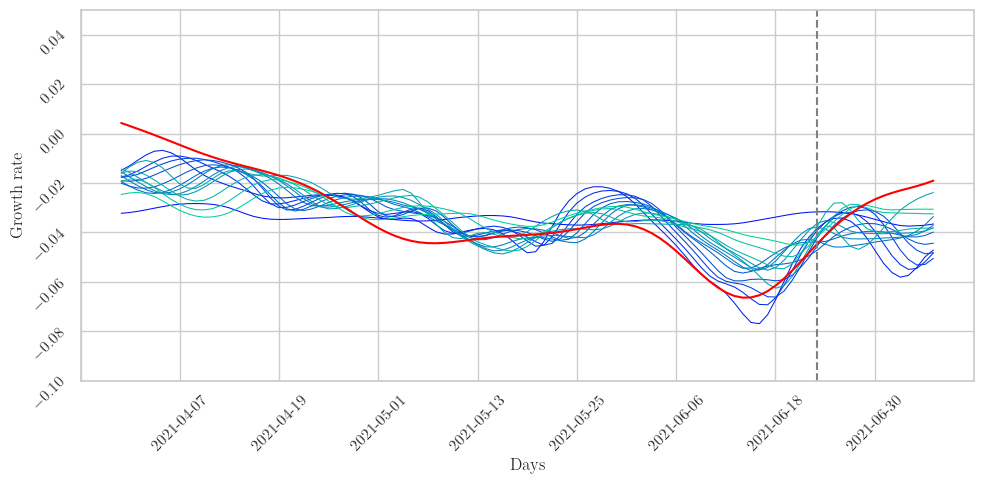

In [123]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axes = plt.subplots( 1 , figsize=(10, 5))#,  sharey='row')
plt.xticks(rotation=90)


for horizon in np.arange(1,15):
    sns.lineplot(x = 'days', y = 'pred'+str(horizon),
             legend = False, size = 0.5,
             data = results_SigLasso_region_normalized_weighted)

sns.lineplot(x = 'days', y = 'truth',
             legend = False, color = 'red',
             data = results_SigLasso_region_normalized_weighted)
axes.axvline(x = results_train_SigLasso_region_normalized['days'].max(), color = 'grey',linestyle = "--")
axes.tick_params(labelrotation=45)
axes.set_ylim(-0.1, 0.05)
axes.xaxis.set_major_locator(ticker.LinearLocator(10))

axes.set_xlabel(xlabel='Days',fontsize=20)
axes.set_ylabel(ylabel='Growth rate',fontsize=20)
plt.tight_layout()

plt.savefig(figure_path +'siglasso_normalized_weighted_' + region + '.pdf', bbox_inches='tight')

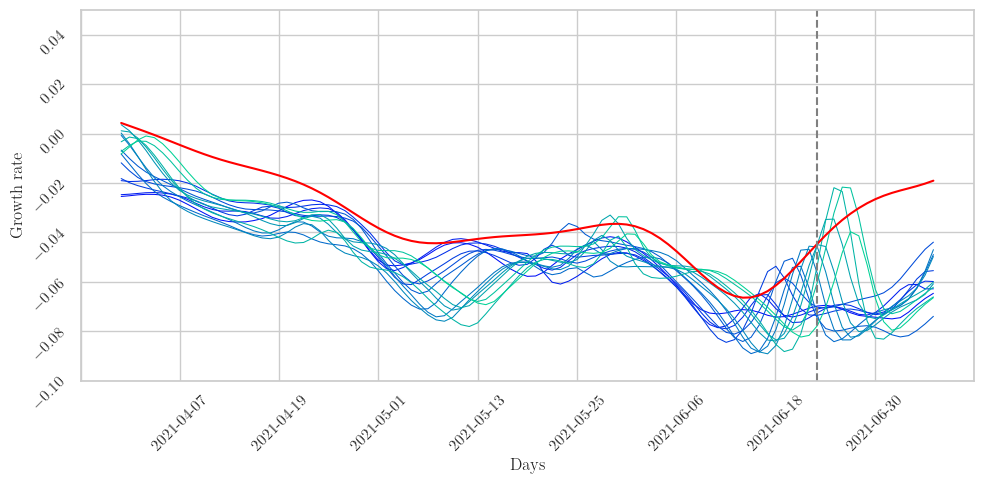

In [133]:
sns.set_style('whitegrid')
sns.set_palette("winter",n_colors=16)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axes = plt.subplots( 1 , figsize=(10, 5))#,  sharey='row')
plt.xticks(rotation=90)


for horizon in np.arange(1,15):
    sns.lineplot(x = 'days', y = 'pred'+str(horizon),
             legend = False, size = 0.5,
             data = results_GRU_region)

sns.lineplot(x = 'days', y = 'truth',
             legend = False, color = 'red',
             data = results_GRU_region)
axes.axvline(x = results_train_GRU_region['days'].max(), color = 'grey',linestyle = "--")
axes.tick_params(labelrotation=45)
axes.set_ylim(-0.1, 0.05)
axes.xaxis.set_major_locator(ticker.LinearLocator(10))


axes.set(ylabel= r'Growth rate')
axes.set(xlabel = 'Days')
plt.tight_layout()

#plt.savefig(figure_path +'gru_' + region + '.pdf', bbox_inches='tight')

# MSE computations

In [59]:
def mse_simple(X, Y):
    """
    X and Y must be of shape (n_samples, dim)

    """
    return np.mean(np.linalg.norm(np.array(X) - np.array(Y)) ** 2)

In [60]:
horizons = np.arange(1,15)

In [61]:
val_mse_test_SigLasso_normalized = []
val_mse_train_SigLasso_normalized = []
for horizon in horizons:
    val_mse_train_SigLasso_normalized.append(
            mse_simple(results_SigLasso_normalized['truth'], results_SigLasso_normalized['pred' +str(horizon)]))
    val_mse_test_SigLasso_normalized.append(
            mse_simple(results_test_SigLasso_normalized['truth'], results_test_SigLasso_normalized['pred' +str(horizon)]))

In [62]:
val_mse_test_SigLasso_normalized_weighted = []
val_mse_train_SigLasso_normalized_weighted = []
for horizon in horizons:
    val_mse_train_SigLasso_normalized_weighted.append(
            mse_simple(results_SigLasso_normalized_weighted['truth'], results_SigLasso_normalized_weighted['pred' +str(horizon)]))
    val_mse_test_SigLasso_normalized_weighted.append(
            mse_simple(results_test_SigLasso_normalized_weighted['truth'], results_test_SigLasso_normalized_weighted['pred' +str(horizon)]))

In [63]:
val_mse_test_NCDE = []
val_mse_train_NCDE = []
for horizon in horizons:
    val_mse_train_NCDE.append(
            mse_simple(results_SigLasso_normalized['truth'], results_NCDE['pred' +str(horizon)]))
    val_mse_test_NCDE.append(
            mse_simple(results_test_SigLasso_normalized['truth'], results_test_NCDE['pred' +str(horizon)]))

In [64]:
val_mse_test_GRU = []
val_mse_train_GRU = []
for horizon in horizons:
    val_mse_train_GRU.append(
            mse_simple(results_SigLasso_normalized['truth'], results_GRU['pred' +str(horizon)]))
    val_mse_test_GRU.append(
            mse_simple(results_test_SigLasso_normalized['truth'], results_test_GRU['pred' +str(horizon)]))

In [65]:
df_results_train = pd.DataFrame({'horizons' : horizons, 
                           'Lasso' : np.sqrt(val_mse_train_SigLasso_normalized),
                            'Lasso_weighted' : np.sqrt(val_mse_train_SigLasso_normalized_weighted),
                           'NCDE' : np.sqrt(val_mse_train_NCDE),
                           'GRU' : np.sqrt(val_mse_train_GRU)                
                          })

df_results_test = pd.DataFrame({'horizons' : horizons, 
                           'Lasso' : np.sqrt(val_mse_test_SigLasso_normalized),
                                'Lasso_weighted' : np.sqrt(val_mse_test_SigLasso_normalized_weighted),
                            'NCDE' : np.sqrt(val_mse_test_NCDE),
                            'GRU' : np.sqrt(val_mse_test_GRU)                
                          })

### RMSE for PNAS

In [66]:
val_mse_train_PNAS =[]
val_mse_test_PNAS =[]
date_train = 84

for horizon in np.arange(1,15):
    val_mse_train_temp = 0
    val_mse_test_temp = 0
    for region in regions:
        results_SigLasso_region = results_SigLasso_normalized.loc[results_SigLasso_normalized['region']==region]
        results_test_SigLasso_region = results_test_SigLasso_normalized.loc[results_SigLasso_normalized['region']==region]
        truth_train = results_SigLasso_region['truth']
        truth_test = results_test_SigLasso_region['truth']
        results_PNAS_region = results_PNAS.loc[results_PNAS['region']==region]
        results_PNAS_region_horizon = \
                results_PNAS_region.loc[results_PNAS_region['prediction_horizon']==horizon]
        pred = results_PNAS_region_horizon['pred_r']
        val_mse_train_temp += np.linalg.norm(truth_train.to_numpy() - pred[0:85])**2
        val_mse_test_temp += np.linalg.norm(truth_test.to_numpy() - pred[84:])**2
    val_mse_train_PNAS.append(val_mse_train_temp)
    val_mse_test_PNAS.append(val_mse_test_temp)

In [67]:
df_results_train['Ensemble'] = val_mse_train_PNAS
df_results_test['Ensemble'] = val_mse_test_PNAS

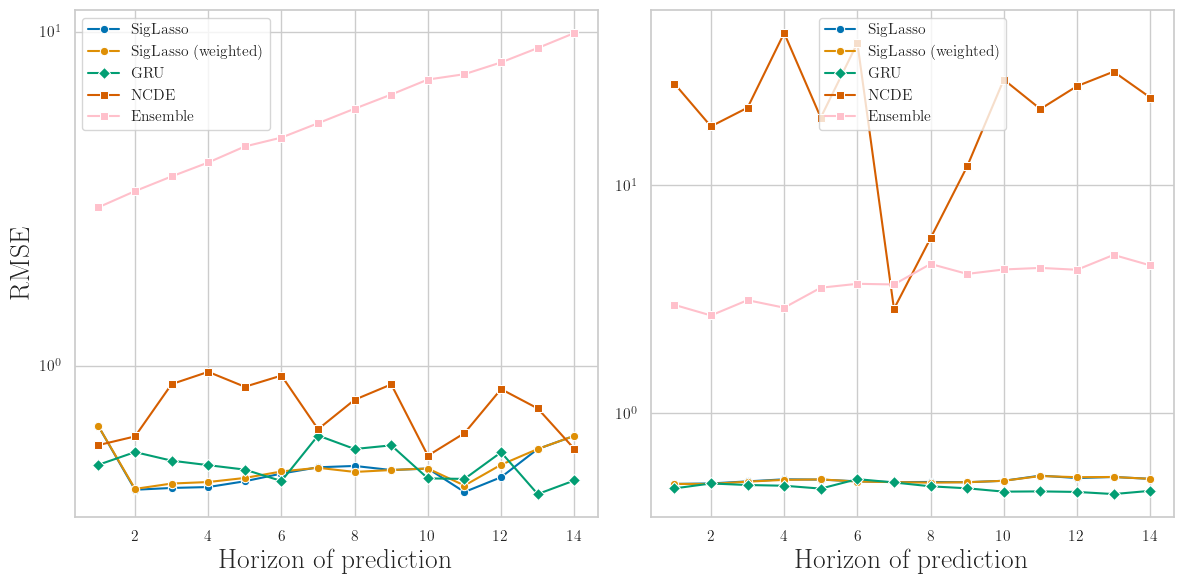

In [71]:
sns.set_style('whitegrid')
sns.set_palette("colorblind")
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axes = plt.subplots( 1 , 2 , figsize=(12, 6))#,  sharey='row')
    
#axes[0].set(title='Training period')
#axes[1].set(title='Testing period')

# linestyle='--',
sns.lineplot(ax=axes[0] , x='horizons', y='Lasso',  data=df_results_train, label='SigLasso',marker="o")
sns.lineplot(ax=axes[0] , x='horizons', y='Lasso_weighted',  data=df_results_train, label='SigLasso (weighted)',marker="o")
sns.lineplot(ax=axes[0] , x='horizons', y='GRU',data=df_results_train, label='GRU',marker="D")
sns.lineplot(ax=axes[0] , x='horizons', y='NCDE', data=df_results_train, label='NCDE',marker="s")

sns.lineplot(ax=axes[0] , x='horizons', y='Ensemble',data=df_results_train, label='Ensemble',marker="s",c='pink')
#axes[0].set_ylim(0, 40)
axes[0].set(xlabel = r'Horizon of prediction', ylabel='Root Mean Square Error')

sns.lineplot(ax=axes[1] , x='horizons', y='Lasso', data=df_results_test, label='SigLasso',marker="o")
sns.lineplot(ax=axes[1] , x='horizons', y='Lasso_weighted',  data=df_results_test, label='SigLasso (weighted)',marker="o")
sns.lineplot(ax=axes[1] , x='horizons', y='GRU', data=df_results_test, label='GRU',marker="D")
sns.lineplot(ax=axes[1] , x='horizons', y='NCDE', data=df_results_test, label='NCDE',marker='s')

sns.lineplot(ax=axes[1] , x='horizons', y='Ensemble',data=df_results_test, label='Ensemble',marker="s",c='pink')


axes[0].set_ylabel(ylabel= r'RMSE',fontsize=20)
axes[0].set_xlabel(xlabel = 'Horizon of prediction',fontsize=20)
axes[1].set_xlabel(xlabel = 'Horizon of prediction',fontsize=20)
axes[1].set_ylabel(ylabel = '')
axes[1].set_yscale('log')
axes[0].set_yscale('log')
plt.tight_layout()


plt.legend()
plt.savefig(figure_path + 'RMSE_SigLasso_NCDE_GRU_Ensemble_covid.pdf', bbox_inches='tight')
plt.show()

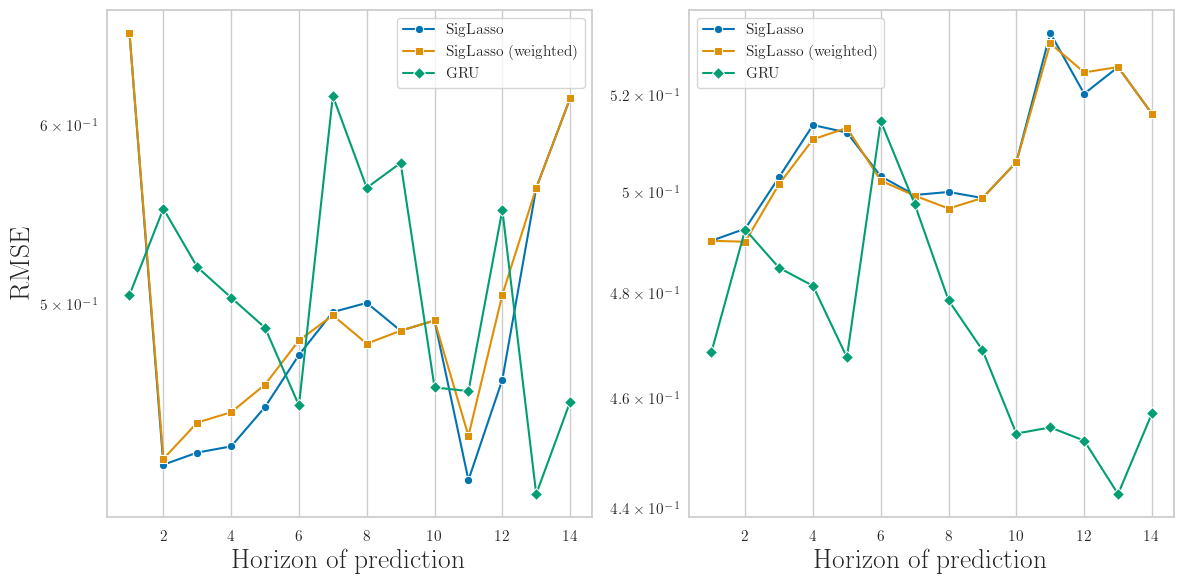

In [25]:
sns.set_style('whitegrid')
sns.set_palette("colorblind")
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axes = plt.subplots( 1 , 2 , figsize=(12, 6))#,  sharey='row')
    
#axes[0].set(title='Train')
#axes[1].set(title='Test')

# linestyle='--',
sns.lineplot(ax=axes[0] , x='horizons', y='Lasso',  data=df_results_train, label='SigLasso',marker="o")
sns.lineplot(ax=axes[0] , x='horizons', y='Lasso_weighted',data=df_results_train, label='SigLasso (weighted)',marker="s")
#axes[0].set_ylim(0, 40)
sns.lineplot(ax=axes[0] , x='horizons', y='GRU',data=df_results_train, label='GRU',marker="D")
axes[0].set(xlabel = r'Horizon of prediction', ylabel='Root Mean Square Error')

sns.lineplot(ax=axes[1] , x='horizons', y='Lasso', data=df_results_test, label='SigLasso',marker="o")
sns.lineplot(ax=axes[1] , x='horizons', y='Lasso_weighted',data=df_results_test, label='SigLasso (weighted)',marker="s")
sns.lineplot(ax=axes[1] , x='horizons', y='GRU', data=df_results_test, label='GRU',marker="D")


axes[0].set_ylabel(ylabel= r'RMSE',fontsize=20)
axes[0].set_xlabel(xlabel = 'Horizon of prediction',fontsize=20)
axes[1].set_xlabel(xlabel = 'Horizon of prediction',fontsize=20)
axes[1].set_ylabel(ylabel = '')
axes[1].set_yscale('log')
axes[0].set_yscale('log')
plt.tight_layout()


plt.legend()
plt.savefig(figure_path + 'RMSE_SigLasso_GRU_covid.pdf', bbox_inches='tight')
plt.show()